In [2]:
import numpy as np
import pandas as pd

# Loading the dataset

In [3]:
txt_path='AnonymizedClinicalAbbreviationsAndAcronymsDataSet.txt'

# Read the CSV file into a DataFrame
data_pd=pd.read_csv( txt_path, sep="|", header=None,encoding='cp1252',)

# Rename the columns
data_pd = data_pd.rename(columns = { 0: 'Abbreviation', 1 : 'Expansion', 2 :'ABB_frm' , 3 : "start_pos", 4: "end_pos", 5 : "info", 6: "context"}, inplace = False)

# Print the shape of the DataFrame
print(data_pd.shape)

(37500, 7)


# Displaying the dataset 

In [4]:
# top 5 rows from the data
data_pd.head()

,Abbreviation,Expansion,ABB_frm,start_pos,end_pos,info,context
0,AB,abortion,AB.,231.0,233.0,NaN,_%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida...
1,AB,abortion,AB.,249.0,251.0,NaN,She is now bleeding quite heavily. Ultrasound ...
2,AB,abortion,AB,223.0,224.0,PAST OB HISTORY,ALLERGIES: Heparin and Imitrex. PAST OB HISTOR...
3,AB,abortion,AB.,194.0,196.0,HISTORY OF THE PRESENT ILLNESS,She had a pelvic ultrasound at Park Nicollet o...
4,AB,abortion,AB,114.0,115.0,PAST OB-GYN HISTORY,"On _%#MMDD2007#%_, normal anatomy with anterio..."


In [5]:
# Drop specified columns from the DataFrame
data_pd = data_pd.drop(['ABB_frm','start_pos','end_pos','info'], axis=1)

In [6]:
data_pd.head()

,Abbreviation,Expansion,context
0,AB,abortion,_%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida...
1,AB,abortion,She is now bleeding quite heavily. Ultrasound ...
2,AB,abortion,ALLERGIES: Heparin and Imitrex. PAST OB HISTOR...
3,AB,abortion,She had a pelvic ultrasound at Park Nicollet o...
4,AB,abortion,"On _%#MMDD2007#%_, normal anatomy with anterio..."


In [8]:
df = data_pd

In [9]:
import pandas as pd

# Count unique expansions for each abbreviation
unique_expansions_count = df.groupby('Abbreviation')['Expansion'].nunique().reset_index()

# Display the resulting DataFrame
print(unique_expansions_count)


   Abbreviation  Expansion
0            AB         12
1            AC         11
2           ALD          5
3           AMA          3
4           ASA          3
..          ...        ...
69           T3          6
70           T4          3
71           US          4
72          VAD          5
73          VBG          2

[74 rows x 2 columns]


In [10]:
ab_df = df[df['Abbreviation'] == 'AB']

# Get the unique expansion names for the abbreviation 'AB'
unique_expansions = ab_df['Expansion'].unique()

# Display the unique expansion names
print(unique_expansions)

['abortion' 'ankle-brachial' 'blood group in ABO system' 'type A, type B'
 'arteriovenous:AV' 'X-ray finding' 'MISTAKE:abduction'
 'antipyrine benzocaine' 'atrioventricular:AV' 'arterial blood'
 'UNSURED SENSE' 'NAME']


In [11]:
import pandas as pd

# Unique expansions and corresponding labels for abbreviation 'AB'
expansion_to_label = {
    'abortion': 0,
    'ankle-brachial': 1,
    'blood group in ABO system': 2,
    'type A, type B': 3,
    'arteriovenous:AV': 4,
    'X-ray finding': 5,
    'MISTAKE:abduction': 6,
    'antipyrine benzocaine': 7,
    'atrioventricular:AV': 8,
    'arterial blood': 9,
    'UNSURED SENSE': 10,
    'NAME': 11,
}

# Create a new column 'label' based on the 'Expansion' column, only for abbreviation 'AB'
df['label'] = df[df['Abbreviation'] == 'AB']['Expansion'].map(expansion_to_label)

# Display the resulting DataFrame
print(df)
import pandas as pd

# Unique expansions and corresponding labels for abbreviation 'AB'
expansion_to_label = {
    'abortion': 0,
    'ankle-brachial': 1,
    'blood group in ABO system': 2,
    'type A, type B': 3,
    'arteriovenous:AV': 4,
    'X-ray finding': 5,
    'MISTAKE:abduction': 6,
    'antipyrine benzocaine': 7,
    'atrioventricular:AV': 8,
    'arterial blood': 9,
    'UNSURED SENSE': 10,
    'NAME': 11,
}

# Create a new column 'label' based on the 'Expansion' column, only for abbreviation 'AB'
df['label'] = df[df['Abbreviation'] == 'AB']['Expansion'].map(expansion_to_label)

# Display the resulting DataFrame
print(df)


      Abbreviation                                 Expansion  \
0               AB                                  abortion   
1               AB                                  abortion   
2               AB                                  abortion   
3               AB                                  abortion   
4               AB                                  abortion   
...            ...                                       ...   
37495          VAD  vincristine adriamycin and dexamethasone   
37496          VAD  vincristine adriamycin and dexamethasone   
37497          VAD  vincristine adriamycin and dexamethasone   
37498          VAD  vincristine adriamycin and dexamethasone   
37499          VAD  vincristine adriamycin and dexamethasone   

                                                 context  label  
0      _%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida...    0.0  
1      She is now bleeding quite heavily. Ultrasound ...    0.0  
2      ALLERGIES: Heparin and Imi

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# splitting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data_pd['context'], data_pd['Abbreviation'], test_size=0.2, random_state=42)


In [14]:
X_train = X_train.fillna('')  # Replace NaN with an empty string
X_test = X_test.fillna('')    # Replace NaN with an empty string

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
model = RandomForestClassifier()

In [17]:
y_train = y_train.fillna('')

In [18]:
# Train the model
model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [19]:
y_test = y_test.fillna('')

In [20]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
predictions = model.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.936
Classification Report:
              precision    recall  f1-score   support

                   1.00      0.99      0.99        98
          AB       0.97      0.99      0.98        98
          AC       0.96      0.96      0.96       118
         ALD       0.99      0.98      0.98        98
         AMA       0.97      1.00      0.99       102
         ASA       0.94      0.96      0.95       104
          AV       0.92      0.96      0.94       107
         AVR       0.99      0.98      0.98        99
         BAL       0.92      0.97      0.94        97
          BK       0.98      0.98      0.98       101
          BM       0.97      0.94      0.96       102
         BMP       0.94      0.94      0.94        96
         C&S       1.00      0.89      0.94       111
          C3       0.71      0.57      0.63       104
          C4       0.55      0.73      0.63        84
          CA       0.97      0.94      0.95       113
         CDI       1.00      0.97      0.9

In [29]:
def classification_report_to_dict(report_str):
    report_list = report_str.split('\n')[2:-5]  # Exclude headers and footer
    report_data = [list(filter(None, x.split(' '))) for x in report_list]
    classes = [x[0] for x in report_data]
    metrics = [list(map(float, x[1:])) for x in report_data]
    return {classes[i]: metrics[i] for i in range(len(classes))}

report_dict = classification_report_to_dict(report)

# Convert dictionary to DataFrame for easier sorting
report_df = pd.DataFrame.from_dict(report_dict, orient='index', columns=['precision', 'recall', 'f1-score', 'support'])

# Sort DataFrame by F1-score in descending order and take top 10
top_10 = report_df.sort_values(by='f1-score', ascending=False).head(10)
print("Top 10 from classification report")
print(top_10)

Top 10 from classification report
      precision  recall  f1-score  support
1.00       0.99    0.99     98.00      NaN
VAD        0.99    1.00      1.00    103.0
CDI        1.00    0.97      0.99    120.0
SMA        1.00    0.97      0.99    103.0
AMA        0.97    1.00      0.99    102.0
SBP        1.00    0.98      0.99    103.0
IA         0.99    0.99      0.99     99.0
FSH        0.99    0.98      0.99    104.0
PD         0.98    0.98      0.98     86.0
AB         0.97    0.99      0.98     98.0


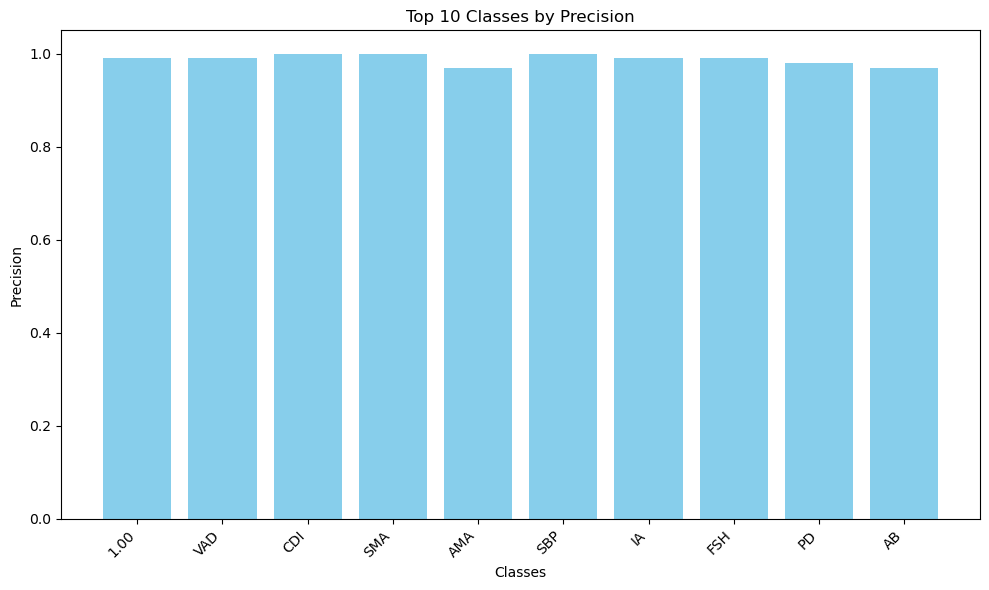

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_10.index, top_10['precision'], color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Top 10 Classes by Precision')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


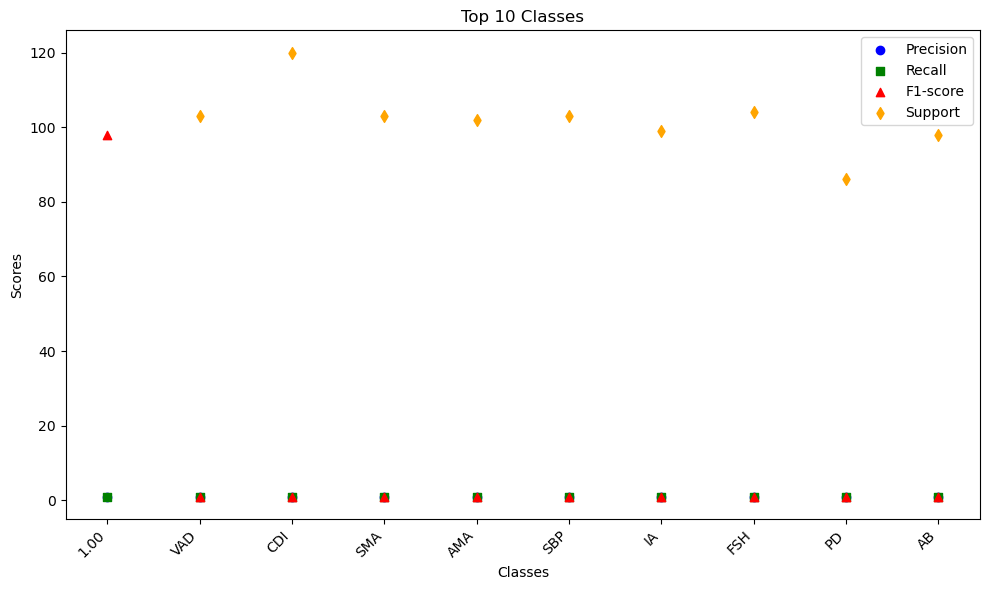

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot for Precision
plt.scatter(top_10.index, top_10['precision'], label='Precision', color='blue', marker='o')

# Scatter plot for Recall
plt.scatter(top_10.index, top_10['recall'], label='Recall', color='green', marker='s')

# Scatter plot for F1-score
plt.scatter(top_10.index, top_10['f1-score'], label='F1-score', color='red', marker='^')

# Scatter plot for Support
plt.scatter(top_10.index, top_10['support'], label='Support', color='orange', marker='d')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Top 10 Classes')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


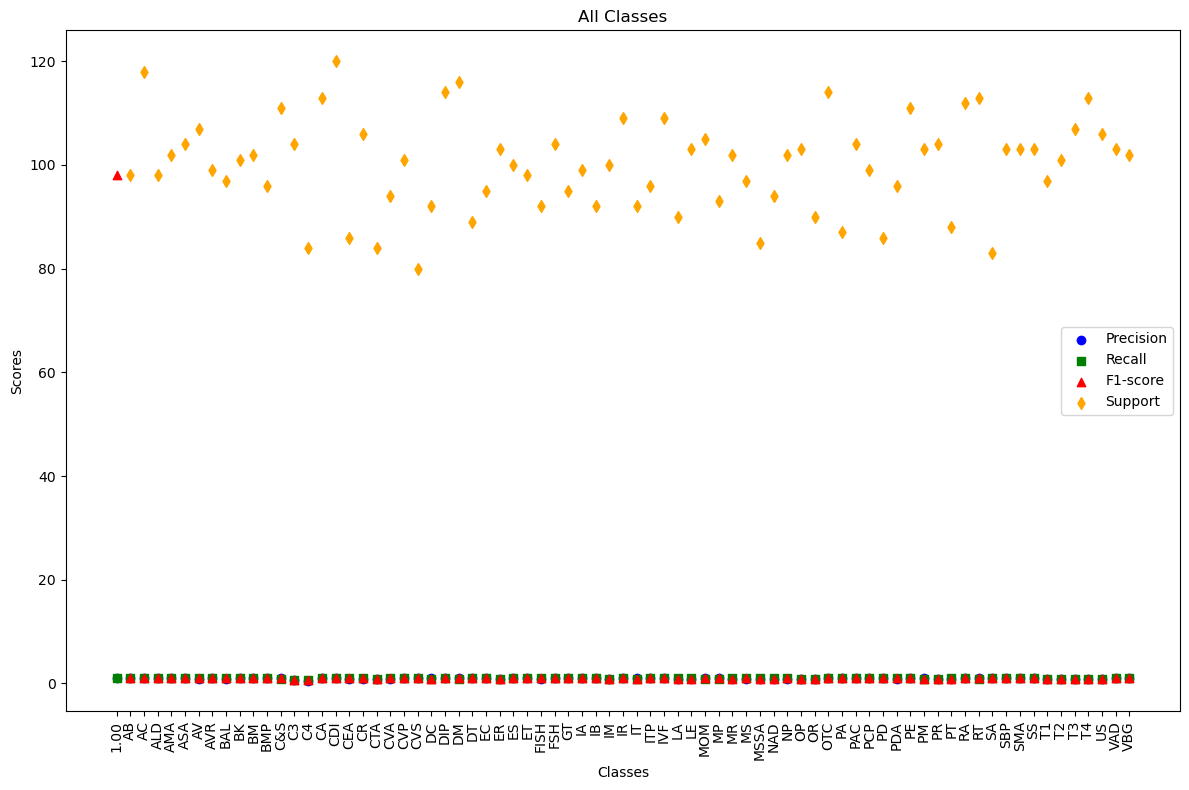

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Scatter plot for Precision
plt.scatter(report_df.index, report_df['precision'], label='Precision', color='blue', marker='o')

# Scatter plot for Recall
plt.scatter(report_df.index, report_df['recall'], label='Recall', color='green', marker='s')

# Scatter plot for F1-score
plt.scatter(report_df.index, report_df['f1-score'], label='F1-score', color='red', marker='^')

# Scatter plot for Support
plt.scatter(report_df.index, report_df['support'], label='Support', color='orange', marker='d')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('All Classes')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [22]:
# Define the preprocess_text function
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text)
    
    # Removing stop words
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    
    # Stemming
    words = [ps.stem(word) for word in words]
    
    # Joining the words back into a string
    processed_text = ' '.join(words)
    
    return processed_text

[nltk_data] Downloading package stopwords to C:\Users\Pradeep
[nltk_data]     Verma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Pradeep
[nltk_data]     Verma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
# Encode target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [25]:
print("Unique labels in training set:", label_encoder.classes_)
print("Unique labels predicted:", set(y_train_encoded))

Unique labels in training set: ['' 'AB' 'AC' 'ALD' 'AMA' 'ASA' 'AV' 'AVR' 'BAL' 'BK' 'BM' 'BMP' 'C&S'
 'C3' 'C4' 'CA' 'CDI' 'CEA' 'CR' 'CTA' 'CVA' 'CVP' 'CVS' 'DC' 'DIP' 'DM'
 'DT' 'EC' 'ER' 'ES' 'ET' 'FISH' 'FSH' 'GT' 'IA' 'IB' 'IM' 'IR' 'IT' 'ITP'
 'IVF' 'LA' 'LE' 'MOM' 'MP' 'MR' 'MS' 'MSSA' 'NAD' 'NP' 'OP' 'OR' 'OTC'
 'PA' 'PAC' 'PCP' 'PD' 'PDA' 'PE' 'PM' 'PR' 'PT' 'RA' 'RT' 'SA' 'SBP'
 'SMA' 'SS' 'T1' 'T2' 'T3' 'T4' 'US' 'VAD' 'VBG']
Unique labels predicted: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74}
